In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_1/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_1/'

# 띄어쓰기 있으면 '' 안에 있음.

Mounted at /gdrive
1_1.ipynb				gadm40_KOR_shp
1_2.ipynb				map.html
지역별_신·재생에너지_발전량_2020년.csv	skorea-provinces-geo.json
energy.csv				TL_SCCO_CTPRVN.json


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [ ]:
# csv 파일 열기
energy = pd.read_csv(drive_path + "지역별_신·재생에너지_발전량_2020년.csv", encoding="euc-kr")
energy

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),2020,2020.1,2020.2,2020.3,2020.4,2020.5,...,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
3,신·재생에너지 총발전량①+② (MWh),자가용,소계,소계,3270157,207652,94380,92700,91328,64683,...,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
4,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,소계,소계,37161788,304645,281073,217755,517763,309035,...,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,② 신에너지,연료전지 (MWh),소계,소계,3522350,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,② 신에너지,연료전지 (MWh),사업용,소계,3485608,335040,183222,5502,951857,-,...,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,② 신에너지,연료전지 (MWh),자가용,소계,36742,6336,1184,2476,1711,3284,...,70,8479,328,624,1547,617,1294,4309,967,191
71,② 신에너지,IGCC (MWh),소계,소계,2377374,-,-,-,-,-,...,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 지역이 나와있는 행을 column 명으로 하기.
before_name = list(energy.columns)
after_name = list(energy.iloc[0])
change_name_dict = dict(zip(before_name, after_name))

energy.rename(columns=change_name_dict, inplace=True)
energy

,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,에너지원별(1),에너지원별(2),에너지원별(3),에너지원별(4),전국,서울,부산,대구,인천,광주,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,신·재생에너지 총발전량①+② (MWh),소계,소계,소계,43061511,646022,465479,225732,1471330,312320,...,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
2,신·재생에너지 총발전량①+② (MWh),사업용,소계,소계,39791354,438369,371099,133032,1380003,247636,...,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
3,신·재생에너지 총발전량①+② (MWh),자가용,소계,소계,3270157,207652,94380,92700,91328,64683,...,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
4,신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,소계,소계,37161788,304645,281073,217755,517763,309035,...,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,② 신에너지,연료전지 (MWh),소계,소계,3522350,341376,184406,7978,953567,3284,...,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
69,② 신에너지,연료전지 (MWh),사업용,소계,3485608,335040,183222,5502,951857,-,...,39664,1223956,48906,-,456645,8008,166746,27846,18669,-
70,② 신에너지,연료전지 (MWh),자가용,소계,36742,6336,1184,2476,1711,3284,...,70,8479,328,624,1547,617,1294,4309,967,191
71,② 신에너지,IGCC (MWh),소계,소계,2377374,-,-,-,-,-,...,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 사업용 + 자가용을 날리고, 소계만 남기기
energy_temp = energy[ energy['에너지원별(3)'] == '소계']
energy_temp.drop(labels=['에너지원별(3)', '에너지원별(4)'], axis=1, inplace=True)

# 에너지원별(1)을 index로
energy_temp.set_index('에너지원별(1)', inplace=True)
energy_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,에너지원별(2),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(1),,,,,,,,,,,,,,,,,,,
신·재생에너지 총발전량①+② (MWh),소계,43061511,646022,465479,225732,1471330,312320,100649,945399,155944,4144715,4853275,2149997,7331177,6839650,4935349,3692919,2312060,2479496
신·재생에너지 총발전량①+② (MWh),사업용,39791354,438369,371099,133032,1380003,247636,44663,645907,127139,3646051,4675861,1905070,7090142,6613105,4653913,3443625,1977255,2398484
신·재생에너지 총발전량①+② (MWh),자가용,3270157,207652,94380,92700,91328,64683,55986,299492,28805,498664,177414,244927,241035,226544,281436,249294,334804,81012
신·재생에너지 총발전량①+② (MWh),① 재생에너지 합,37161788,304645,281073,217755,517763,309035,91765,931412,116209,2912279,4804041,2149373,4495612,6831024,4767309,3660764,2292423,2479305
신·재생에너지 총발전량①+② (MWh),② 신에너지 합,5899723,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,2835565,8625,168040,32155,19637,191
신·재생에너지 지역별 발전비중 (%),소계,100.00,1.50,1.08,0.52,3.42,0.73,0.23,2.20,0.36,9.63,11.27,4.99,17.02,15.88,11.46,8.58,5.37,5.76
① 재생에너지,태양광 (MWh),19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
① 재생에너지,풍력 (MWh),3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
① 재생에너지,수력 (MWh),3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399


In [ ]:
# 재생에너지 타입별로 나누기
energy_percent = energy_temp[5:6].copy()    # 에너지 비율
energy_region = energy_temp[0:1].copy()     # 총 발전 에너지
energy_type = energy_temp[6:].copy()        # energy_type : 태양광~

energy_type

,에너지원별(2),전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(1),,,,,,,,,,,,,,,,,,,
① 재생에너지,태양광 (MWh),19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
① 재생에너지,풍력 (MWh),3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
① 재생에너지,수력 (MWh),3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
① 재생에너지,해양 (MWh),457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
① 재생에너지,바이오 (MWh),9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
① 재생에너지,폐기물 (MWh),439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
② 신에너지,연료전지 (MWh),3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
② 신에너지,IGCC (MWh),2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# 에너지원별로 index를 맞추기
energy_type.reset_index(inplace=True)
energy_gragh = energy_type.drop(['에너지원별(1)'], axis=1).set_index('에너지원별(2)')
energy_gragh

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,,
태양광 (MWh),19297854,227866,227442,169862,188044,290921,90593,123674,85366,1424397,1408163,1109875,2478947,3240493,3969762,2316120,1456699,489629
풍력 (MWh),3149798,201,253,26,52828,2,398,1514,-,5625,782254,16,2986,131205,576229,944024,74178,578059
수력 (MWh),3879383,1112,93,12951,39579,7795,241,1457,-,649895,1062271,1010026,61599,285784,114120,319014,310046,3399
해양 (MWh),457263,-,-,-,-,-,-,-,-,457257,-,-,-,-,-,-,-,5.6
바이오 (MWh),9938354,29554,9827,29663,228842,4779,-,799437,25790,302034,1526563,8846,1934819,3157632,45367,29698,434237,1371267
폐기물 (MWh),439137,45912,43458,5252,8470,5539,533,5330,5053,73072,24791,20610,17261,15911,61831,51907,17263,36946
연료전지 (MWh),3522350,341376,184406,7978,953567,3284,8884,13987,39734,1232435,49234,624,458191,8625,168040,32155,19637,191
IGCC (MWh),2377374,-,-,-,-,-,-,-,-,-,-,-,2377374,-,-,-,-,-


In [ ]:
# object를 float64로 변환하기
energy_gragh = energy_gragh.replace('-', 0)
energy_gragh = energy_gragh.astype('float64')
energy_gragh

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,,
태양광 (MWh),19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력 (MWh),3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력 (MWh),3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양 (MWh),457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오 (MWh),9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물 (MWh),439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지 (MWh),3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC (MWh),2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(energy_gragh.index)

['태양광 (MWh)',
 '풍력 (MWh)',
 '수력 (MWh)',
 '해양 (MWh)',
 '바이오 (MWh)',
 '폐기물 (MWh)',
 '연료전지 (MWh)',
 'IGCC (MWh)']

In [ ]:
index_i = []
for i in list(energy_gragh.index):
    index_i.append(i[:-6])
index_i

['태양광', '풍력', '수력', '해양', '바이오', '폐기물', '연료전지', 'IGCC']

In [ ]:
energy_gragh.rename(index=dict(zip(list(energy_gragh.index), index_i)), inplace=True)
energy_gragh

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
energy_gragh

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,,
태양광,19297854.0,227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력,3149798.0,201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력,3879383.0,1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양,457263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오,9938354.0,29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물,439137.0,45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지,3522350.0,341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC,2377374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(energy_gragh.columns)[5]

'광주'

In [ ]:
city_name = list(energy_gragh.columns)[5]       # 광주
gra_ex = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 < 1].sum()   # 1.0
gra = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 > 1]  
gra.loc['기타'] = gra_ex
gra / gra.sum() * 100

에너지원별(2)
태양광     93.148373
수력       2.495838
바이오      1.530161
폐기물      1.773502
연료전지     1.051486
기타       0.000640
Name: 광주, dtype: float64

In [ ]:

# 1퍼센트 미만은 기타로 처리하자.
city_name = list(energy_gragh.columns)[idx]
gra_temp = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 <= 2].sum()
gra = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 > 2]   
gra.loc['기타'] = gra_temp

axes[j, k].set_ylim(0,100)
for num in gra.index:            
    axes[j, k].bar(num, num / gra.sum() * 100, color=choice_color(num))        # 비율 코드
axes[j, k].set_title(city_name, fontsize=11)
idx += 1


In [ ]:
gra.index

Index(['태양광', '수력', '바이오', '폐기물', '연료전지', '기타'], dtype='object', name='에너지원별(2)')

In [ ]:
gra.values

array([2.90921e+05, 7.79500e+03, 4.77900e+03, 5.53900e+03, 3.28400e+03,
       2.00000e+00])

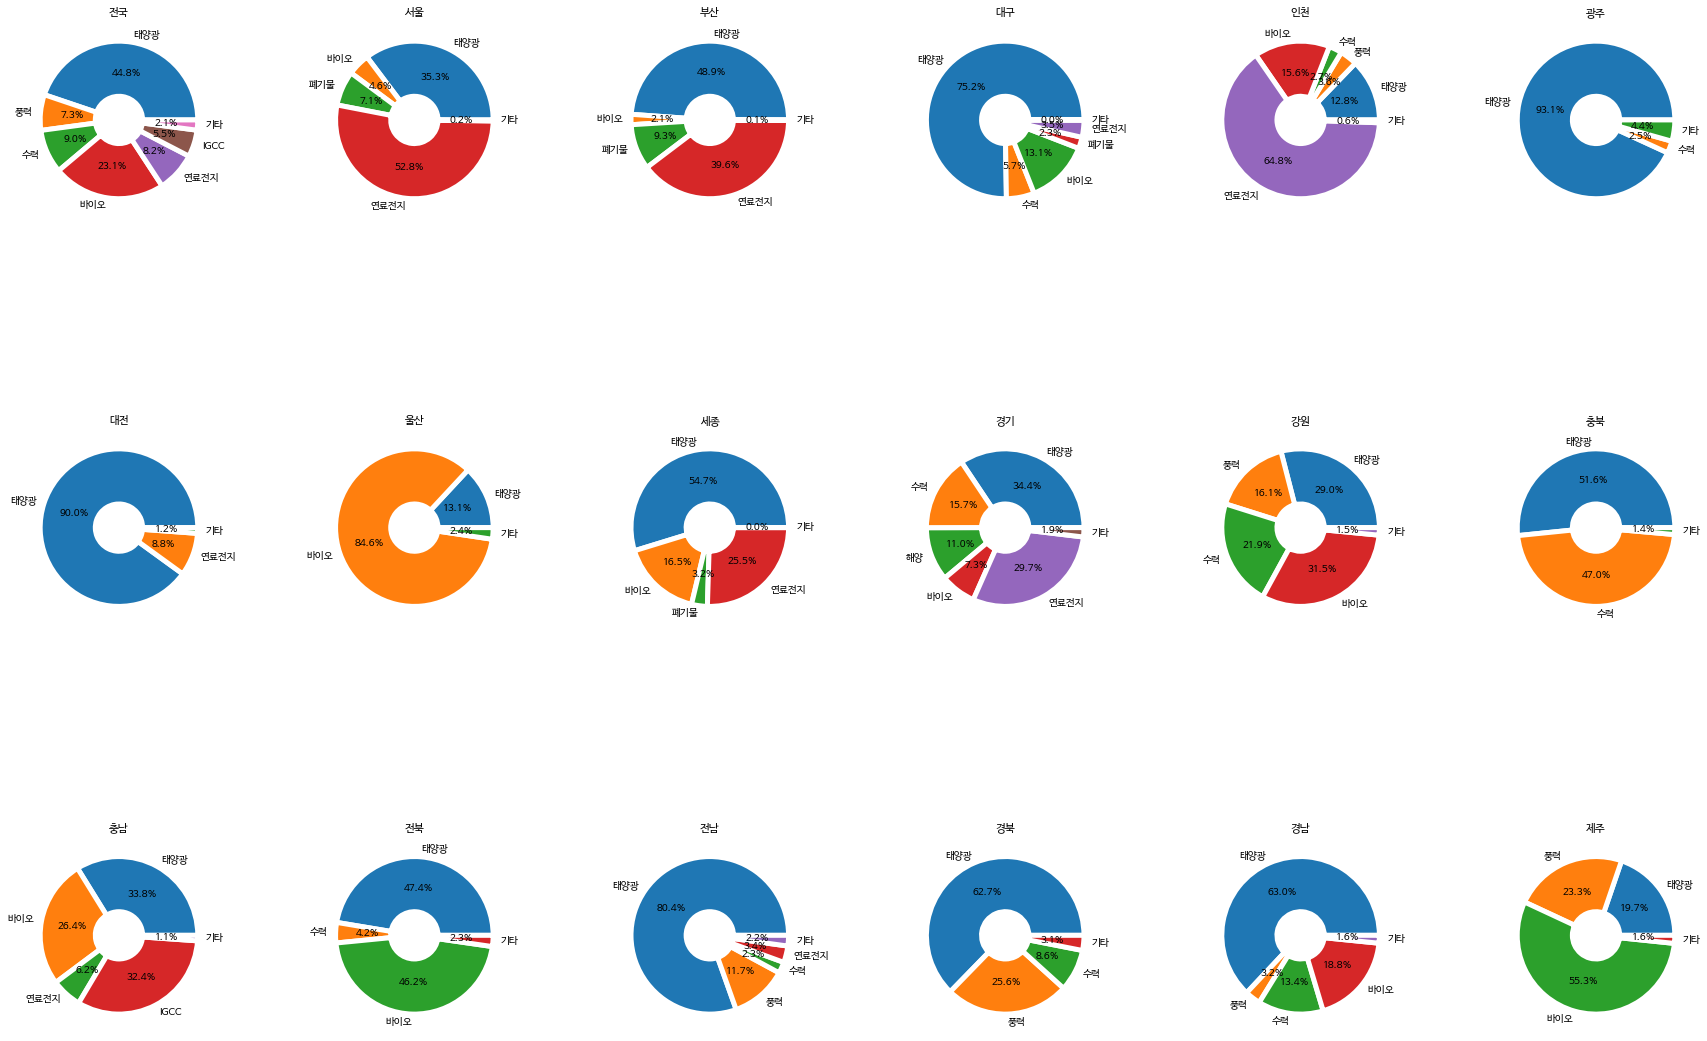

In [ ]:
f, axes = plt.subplots(3, 6)

f.set_size_inches((30, 20))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
idx = 0
for j in range(3):
    for k in range(6):
        # 1퍼센트 미만은 기타로 처리하자.
        city_name = list(energy_gragh.columns)[idx]
        gra_temp = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 <= 2].sum()
        gra = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 > 2]   
        gra.loc['기타'] = gra_temp

        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
        axes[j, k].pie(gra, labels=gra.index, autopct='%.1f%%', wedgeprops=wedgeprops)
        axes[j, k].set_title(city_name, fontsize=11)
        idx += 1


plt.show()

In [ ]:
# 색 결정 함수
def choice_color(x):
    color_dict = {'태양광':'y', '풍력':'c', '수력':'b', '바이오':'m', '연료전지':'m', 'IGCC' : 'y', '폐기물':'k', '해양': 'b', '기타':'k'}
    temp = []
    for i in x:
        temp.append(color_dict[f'{i}'])

    return temp

choice_color(['태양광', '풍력'])

['y', 'c']

In [ ]:
list(gra.index)

['태양광', '풍력', '수력', '바이오', '연료전지', 'IGCC', '기타']

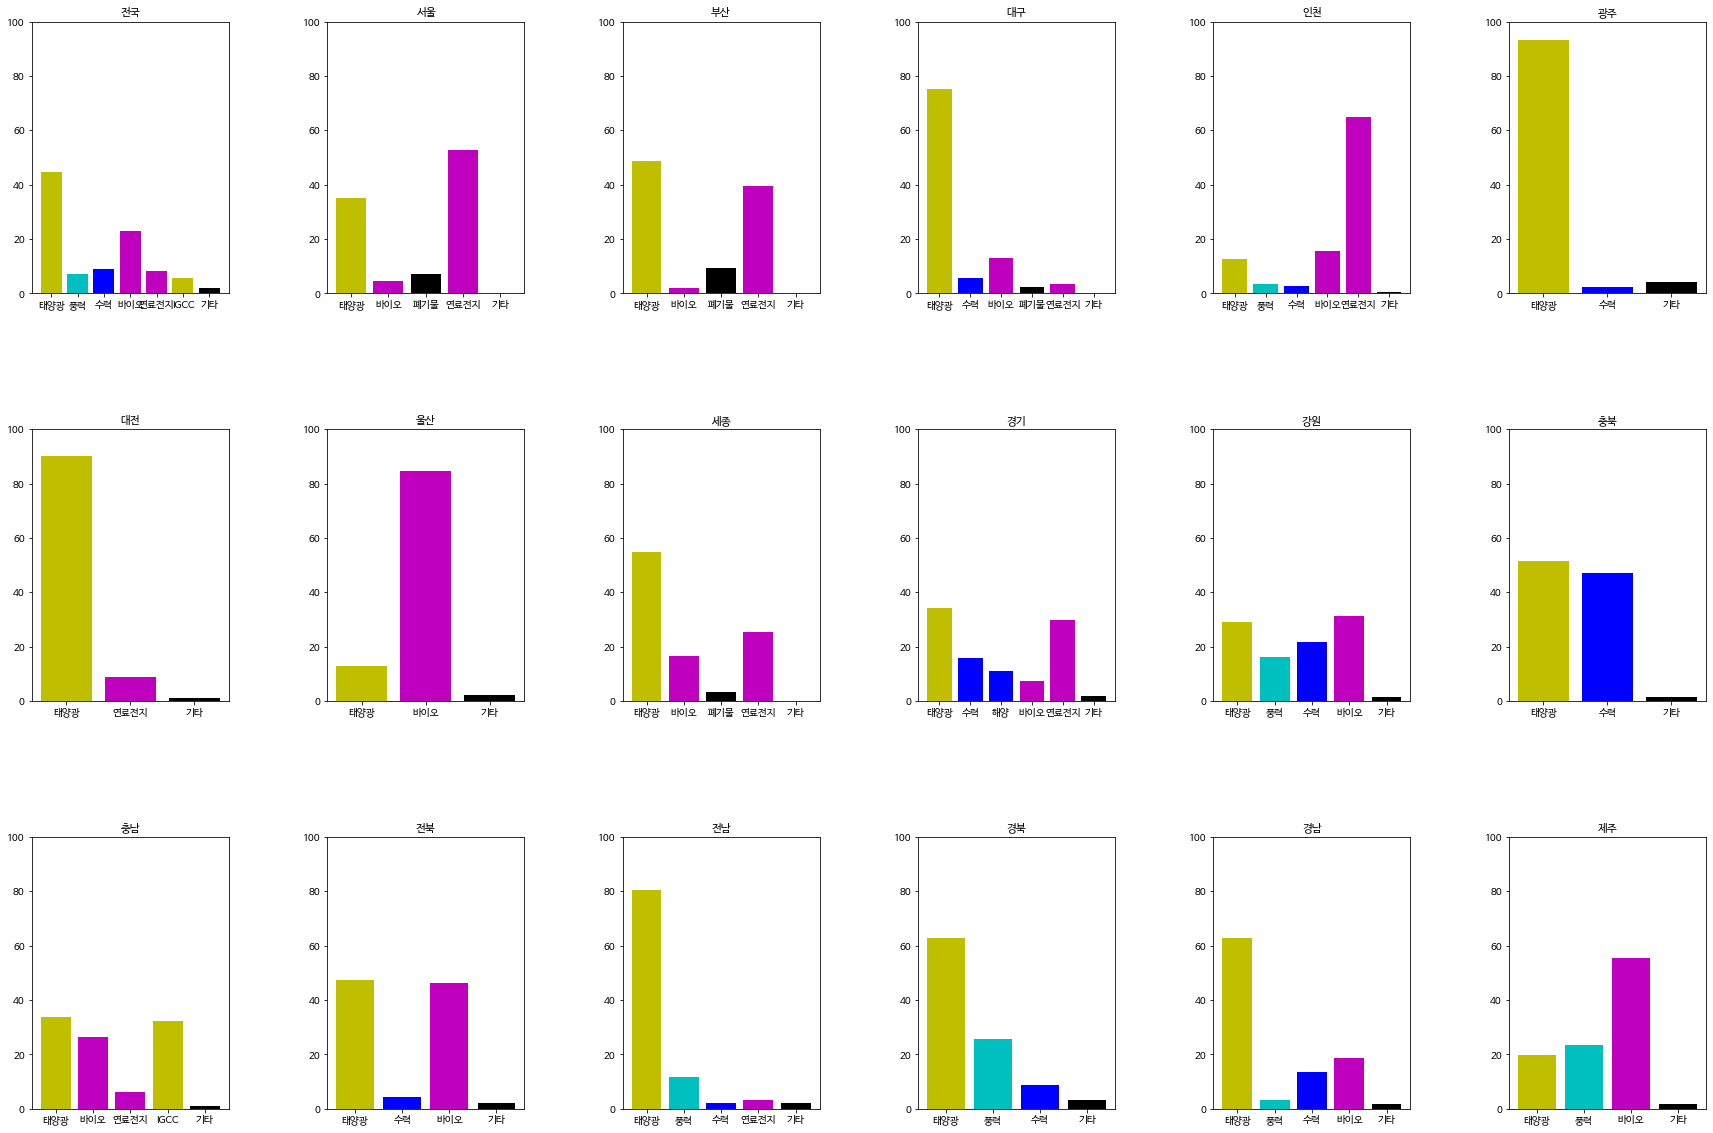

In [ ]:
f, axes = plt.subplots(3, 6)

f.set_size_inches((30, 20))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
idx = 0

for j in range(3):
    for k in range(6):
        # 1퍼센트 미만은 기타로 처리하자.
        city_name = list(energy_gragh.columns)[idx]
        gra_temp = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 <= 2].sum()
        gra = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 > 2]   
        gra.loc['기타'] = gra_temp

        axes[j, k].set_ylim(0,100)

        axes[j, k].bar(gra.index, gra / gra.sum() * 100, color=choice_color(list(gra.index)))        # 비율 코드
        axes[j, k].set_title(city_name, fontsize=11)
        idx += 1


plt.show()

In [ ]:
f, axes = plt.subplots(3, 6)

f.set_size_inches((30, 20))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
idx = 0
for j in range(3):
    for k in range(6):
        # 1퍼센트 미만은 기타로 처리하자.
        city_name = list(energy_gragh.columns)[idx]
        gra_temp = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 <= 2].sum()
        gra = energy_gragh[f'{city_name}'][energy_gragh[f'{city_name}'] / energy_gragh[f'{city_name}'].sum() * 100 > 2]   
        gra.loc['기타'] = gra_temp

        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
        axes[j, k].pie(gra, labels=gra.index, autopct='%.1f%%', wedgeprops=wedgeprops)
        axes[j, k].set_title(city_name, fontsize=11)
        idx += 1


plt.show()

In [ ]:
eng = energy_gragh.copy().iloc[:, 1:]
eng.loc['합'] = eng.sum(axis=0)
eng

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,
태양광 (MWh),227866.0,227442.0,169862.0,188044.0,290921.0,90593.0,123674.0,85366.0,1424397.0,1408163.0,1109875.0,2478947.0,3240493.0,3969762.0,2316120.0,1456699.0,489629.0
풍력 (MWh),201.0,253.0,26.0,52828.0,2.0,398.0,1514.0,0.0,5625.0,782254.0,16.0,2986.0,131205.0,576229.0,944024.0,74178.0,578059.0
수력 (MWh),1112.0,93.0,12951.0,39579.0,7795.0,241.0,1457.0,0.0,649895.0,1062271.0,1010026.0,61599.0,285784.0,114120.0,319014.0,310046.0,3399.0
해양 (MWh),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,457257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
바이오 (MWh),29554.0,9827.0,29663.0,228842.0,4779.0,0.0,799437.0,25790.0,302034.0,1526563.0,8846.0,1934819.0,3157632.0,45367.0,29698.0,434237.0,1371267.0
폐기물 (MWh),45912.0,43458.0,5252.0,8470.0,5539.0,533.0,5330.0,5053.0,73072.0,24791.0,20610.0,17261.0,15911.0,61831.0,51907.0,17263.0,36946.0
연료전지 (MWh),341376.0,184406.0,7978.0,953567.0,3284.0,8884.0,13987.0,39734.0,1232435.0,49234.0,624.0,458191.0,8625.0,168040.0,32155.0,19637.0,191.0
IGCC (MWh),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377374.0,0.0,0.0,0.0,0.0,0.0
합,646021.0,465479.0,225732.0,1471330.0,312320.0,100649.0,945399.0,155943.0,4144715.0,4853276.0,2149997.0,7331177.0,6839650.0,4935349.0,3692918.0,2312060.0,2479496.6


In [ ]:
eng.to_csv(drive_path + 'energy.csv', mode='w')

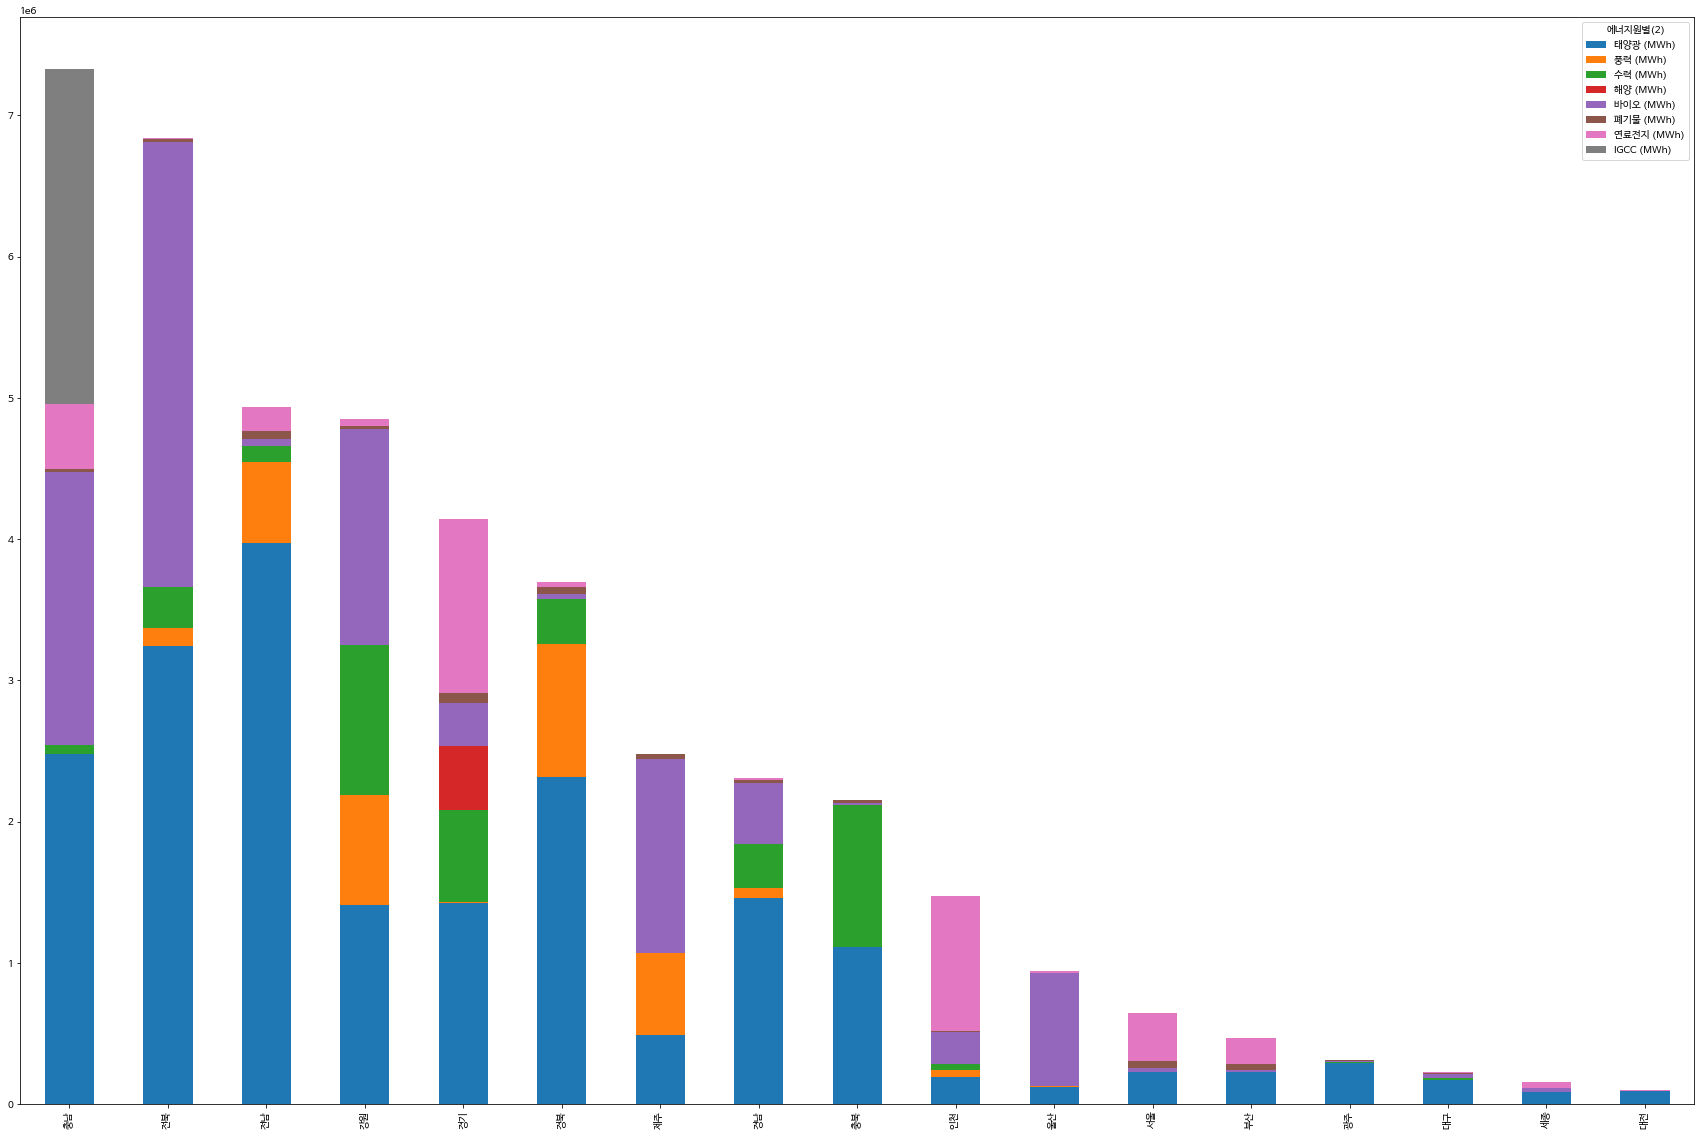

In [ ]:
sorted_eng = eng.T.sort_values(by='합' ,ascending=False)

sorted_eng.iloc[:,:-1].plot(kind="bar", stacked=True, figsize=(30, 20))
plt.show()

In [ ]:
sorted_eng

에너지원별(2),태양광 (MWh),풍력 (MWh),수력 (MWh),해양 (MWh),바이오 (MWh),폐기물 (MWh),연료전지 (MWh),IGCC (MWh),합
충남,2478947.0,2986.0,61599.0,0.0,1934819.0,17261.0,458191.0,2377374.0,7331177.0
전북,3240493.0,131205.0,285784.0,0.0,3157632.0,15911.0,8625.0,0.0,6839650.0
전남,3969762.0,576229.0,114120.0,0.0,45367.0,61831.0,168040.0,0.0,4935349.0
강원,1408163.0,782254.0,1062271.0,0.0,1526563.0,24791.0,49234.0,0.0,4853276.0
경기,1424397.0,5625.0,649895.0,457257.0,302034.0,73072.0,1232435.0,0.0,4144715.0
경북,2316120.0,944024.0,319014.0,0.0,29698.0,51907.0,32155.0,0.0,3692918.0
제주,489629.0,578059.0,3399.0,5.6,1371267.0,36946.0,191.0,0.0,2479496.6
경남,1456699.0,74178.0,310046.0,0.0,434237.0,17263.0,19637.0,0.0,2312060.0
충북,1109875.0,16.0,1010026.0,0.0,8846.0,20610.0,624.0,0.0,2149997.0
인천,188044.0,52828.0,39579.0,0.0,228842.0,8470.0,953567.0,0.0,1471330.0


In [ ]:
import json

In [ ]:
import folium

In [ ]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 58.0 MB/s 
     |████████████████████████████████| 16.7 MB 24.1 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
shapefile = drive_path + "gadm40_KOR_shp/gama40_KOR_1.shp"
gdf = gpd.read_file(shapefile)[['NAME_1', ' geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ..."
1,Chungcheongbuk-do,"POLYGON ((127.86983 36.32472, 127.86292 36.317..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ..."
3,Daegu,"POLYGON ((128.68890 35.72989, 128.68930 35.719..."
4,Daejeon,"POLYGON ((127.52377 36.37342, 127.52950 36.361..."
5,Gangwon-do,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ..."
6,Gwangju,"POLYGON ((127.01091 35.09471, 127.00610 35.087..."
7,Gyeonggi-do,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ..."
8,Gyeongsangbuk-do,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ..."
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ..."


In [ ]:
list(gdf.name)

['Busan',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Daegu',
 'Daejeon',
 'Gangwon-do',
 'Gwangju',
 'Gyeonggi-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Incheon',
 'Jeju',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Sejong',
 'Seoul',
 'Ulsan']

In [ ]:
name_new = ['부산', '충북', '충남', '대구', '대전', '강원', '광주', '경기', '경북', '경남', '인천', '제주', '전북', '전남', '세종', '서울', '울산']

In [ ]:
gdf.name = name_new

In [ ]:
gdf

,name,geometry
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ..."
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317..."
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ..."
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719..."
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361..."
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ..."
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087..."
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ..."
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ..."
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ..."


In [ ]:
gdf.name

0     부산
1     충북
2     충남
3     대구
4     대전
5     강원
6     광주
7     경기
8     경북
9     경남
10    인천
11    제주
12    전북
13    전남
14    세종
15    서울
16    울산
Name: name, dtype: object

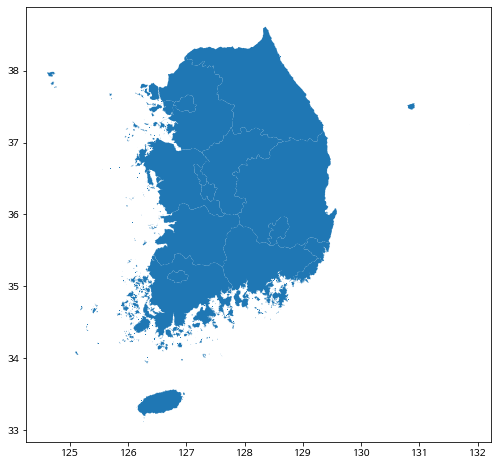

In [ ]:
# 시도경계 지도화
gdf.plot(figsize=(16, 8))

In [ ]:
eng_temp = eng.iloc[-1:].copy()
np.array(eng_temp.values).reshape(17,)

array([ 646021. ,  465479. ,  225732. , 1471330. ,  312320. ,  100649. ,
        945399. ,  155943. , 4144715. , 4853276. , 2149997. , 7331177. ,
       6839650. , 4935349. , 3692918. , 2312060. , 2479496.6])

In [ ]:
eng_temp.columns

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [ ]:
eng_temp

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
에너지원별(2),,,,,,,,,,,,,,,,,
합,646021.0,465479.0,225732.0,1471330.0,312320.0,100649.0,945399.0,155943.0,4144715.0,4853276.0,2149997.0,7331177.0,6839650.0,4935349.0,3692918.0,2312060.0,2479496.6


In [ ]:
print(list(eng_temp.columns))

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']


In [ ]:
eng_temp1 = pd.DataFrame(np.array(eng_temp.values).reshape(17,), index=list(eng_temp.columns))
eng_temp1.reset_index(inplace=True)
eng_temp1

,index,0
0,서울,646021.0
1,부산,465479.0
2,대구,225732.0
3,인천,1471330.0
4,광주,312320.0
5,대전,100649.0
6,울산,945399.0
7,세종,155943.0
8,경기,4144715.0
9,강원,4853276.0


In [ ]:
gdf_heat = gdf.merge(eng_temp1, left_on='name', right_on='index', how='outer').fillna(0)
gdf_heat

,name,geometry,index,0
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ...",부산,465479.0
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317...",충북,2149997.0
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ...",충남,7331177.0
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719...",대구,225732.0
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361...",대전,100649.0
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ...",강원,4853276.0
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087...",광주,312320.0
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ...",경기,4144715.0
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ...",경북,3692918.0
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ...",경남,2312060.0


In [ ]:
gdf_heat.drop(["index"], axis=1, inplace=True)
gdf_heat

,name,geometry,0
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ...",465479.0
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317...",2149997.0
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ...",7331177.0
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719...",225732.0
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361...",100649.0
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ...",4853276.0
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087...",312320.0
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ...",4144715.0
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ...",3692918.0
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ...",2312060.0


In [ ]:
gdf_heat = gdf_heat.rename(columns={0:'신재생에너지 발전량'})
gdf_heat

,name,geometry,신재생에너지 발전량
0,부산,"MULTIPOLYGON (((128.99403 34.98042, 128.99292 ...",465479.0
1,충북,"POLYGON ((127.86983 36.32472, 127.86292 36.317...",2149997.0
2,충남,"MULTIPOLYGON (((126.28458 36.25042, 126.28458 ...",7331177.0
3,대구,"POLYGON ((128.68890 35.72989, 128.68930 35.719...",225732.0
4,대전,"POLYGON ((127.52377 36.37342, 127.52950 36.361...",100649.0
5,강원,"MULTIPOLYGON (((129.18263 37.46051, 129.18263 ...",4853276.0
6,광주,"POLYGON ((127.01091 35.09471, 127.00610 35.087...",312320.0
7,경기,"MULTIPOLYGON (((126.72931 37.01292, 126.72931 ...",4144715.0
8,경북,"MULTIPOLYGON (((128.54610 35.63231, 128.54810 ...",3692918.0
9,경남,"MULTIPOLYGON (((128.34598 34.56264, 128.34598 ...",2312060.0


In [ ]:
type(gdf_heat)

geopandas.geodataframe.GeoDataFrame

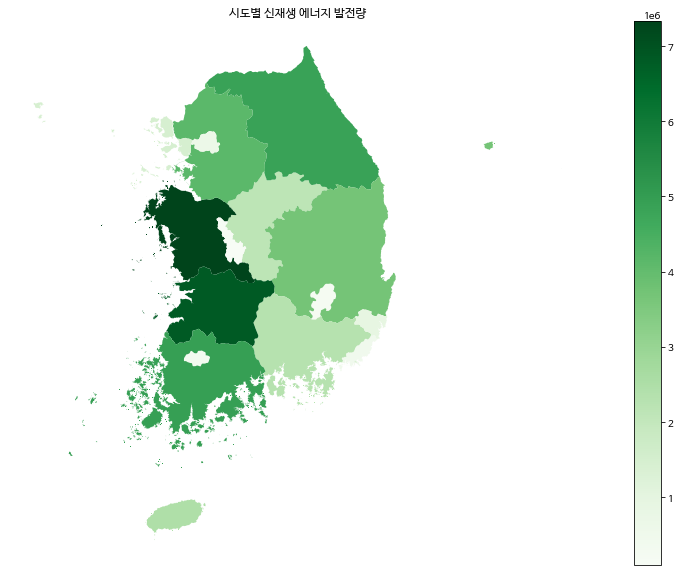

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(16,10))
gdf_heat.plot(column='신재생에너지 발전량', 
              legend=True, 
              ax=ax, 
              cmap='Greens')

ax.set_title("시도별 신재생 에너지 발전량")
ax.set_axis_off()

plt.show()


In [ ]:
a = 1000000
range(a,17*a, a)

range(1000000, 17000000, 1000000)

In [ ]:
list[range(a,17*a, a)]

TypeError: ignored